In [1]:
''' 
TO USE: Run this block of code at the beginning; this lets the program know what packages to load in, essentially.
'''
# might need to run %matplotlib notebook or %matplotlib ipympl if below line doesn't work
%matplotlib widget 
from ipywidgets import * 
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

interactive(children=(FloatSlider(value=0.0001, description='beta', max=0.001, readout_format='.5f', step=1e-0…

<function __main__.update(beta=0.0001, gamma=0.1, mu=0.0, timespan=200, population=2000)>

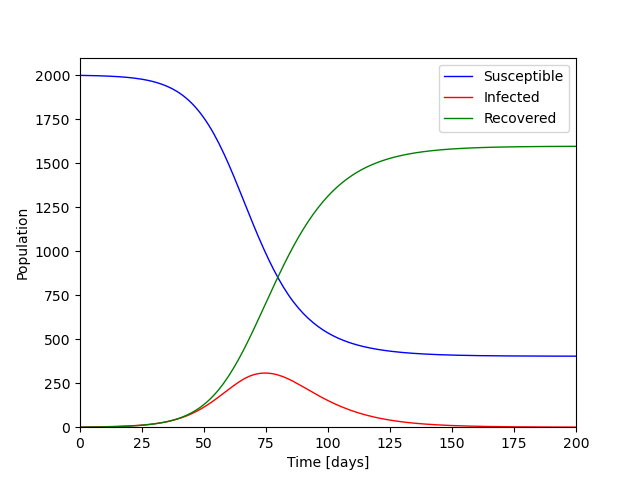

In [2]:
# let's make an interactive plot for our basic SIR model! 
'''
TO USE: 
Just run this block of code, and use the sliders to adjust the basic parameters for the open SIR model :)
 '''
# define the open population model
def open_SIR_model(t, p, beta, gamma, mu): # p = (S, I, R), N is total population size (S + I + R = N)
    S, I, R = p[0], p[1], p[2]
    N = S + I + R

    ''' This function returns the three differential equations that describe our open SIR model.
    '''
    return [mu * N - beta * S * I - mu * S, #dS/dt
            beta * S * I - gamma * I - mu * I, # dI/dt
            gamma * I - mu * R] # dR/dt

# this defines a function to run the SIR model, and outputs the solution given by the solve_ivp function
def run_open_SIR(N = 2000, beta = 1e-4, gamma = 0.1, mu = 0.0, dt = 1, span = 2000):
    I0, S0, R0 = 1, N - 1, 0 # define initial population parameters

    t_range = np.arange(0, span + 1, dt) # define interval in which to evaluate the model, beginning from 0
    t_span = [t_range[0], t_range[-1]]

    soln = solve_ivp(open_SIR_model, t_span, [S0, I0, R0], args = (beta, gamma, mu), t_eval = t_range)
    return soln

'''We make an initial plot with default parameters, then update it each time a parameters is changed'''
soln_open = run_open_SIR() # runs model with default parameters
S, I, R = soln_open.y # gets the solutions
t = soln_open.t # gets the time range (our x-axis)

# now make the plot :)
fig, ax = plt.subplots()

l1, = ax.plot(t, S, lw = 1, color = 'b', label = 'Susceptible')
l2, = ax.plot(t, I, lw = 1, color = 'r', label = 'Infected')
l3, = ax.plot(t, R, lw = 1, color = 'green', label = 'Recovered')

ax.set_xlabel('Time [days]')
ax.set_ylabel('Population')
# ax.set_title(f"N = {total_pop}, beta = {beta}, gamma = {gamma}, mu = {mu}")
ax.legend()

# the update function needs to rerun the simulation to determine the new S, I, R populations with each change
def update(beta = 0.0001, gamma = 0.1, mu = 0.0, timespan = 200, population = 2000): 
    # reruns the simulation with updated parameter values
    soln = run_open_SIR(beta = beta, gamma = gamma, mu = mu, span = timespan, N = population)

    S, I, R = soln.y
    t = soln.t

    # update the curves for each population!
    l1.set_data(t, S)
    l2.set_data(t, I)
    l3.set_data(t, R)

    # update the x and y limits in the axis
    ax.set_xlim(0, timespan)
    ax.set_ylim(0, population + 100)

    fig.canvas.draw_idle() # involved with drawing / updating

'''Make the plot interactive!'''
# we need to define the parameters of each slider object
slider_beta = widgets.FloatSlider(value=1e-4, min=0, max=1e-3, step=1e-5, readout_format='.5f')
slider_gamma = widgets.FloatSlider(value=0.1, min=0, max=1, step=0.01, readout_format='.2f')
slider_mu = widgets.FloatSlider(value=0.0, min=0, max=0.01, step=0.001, readout_format='.3f')

slider_timespan = widgets.IntSlider(value=200, min=10, max=3000, step=10)
slider_population = widgets.IntSlider(value=2000, min=10, max=10000, step=10)


interact(update, beta = slider_beta, gamma = slider_gamma, mu = slider_mu, timespan  = slider_timespan, population = slider_population)